# Preparing data for Modelling

In [402]:
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer
from sklearn.base import clone

import seaborn as sns

import quantstats as qs
import os 
# pd.set_option('display.max_rows', None)
import os 

# To automatically load changes in different files 
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns 
import matplotlib.pyplot as plt 
# Applying Settings to Viaualization Tools 
plt.rcParams['font.size'] = 13
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
# Set color palette to blue shades
sns.set_palette(["#003366", "#6699CC", "#99CCFF", "#99CCFF"])
sns.set_palette(["#002855", "#3E7EAA", "#82B5D8", "#B3D9F2"])
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_style("darkgrid")

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, mean_absolute_percentage_error

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [524]:
track_results = {}
counter = 0

In [318]:
from utils import search_folder
current_dir = os.getcwd()
thesis_folder_path = current_dir.replace("thesis_code", "")
twitter_data_path = search_folder(thesis_folder_path,"twitter_data")
eikon_data_path = search_folder(thesis_folder_path,"eikon_news")
stock_data_path = search_folder(thesis_folder_path,"stock_prices")
modelling_data_path = search_folder(thesis_folder_path,"modelling_data")
google_trending_path = search_folder(thesis_folder_path,"google_search")

In [319]:
def read_modelling(path, name):
    df = pd.read_csv(path+name)
    df["datetime"] = pd.to_datetime(df["datetime"])
    df = df.sort_values(by = "datetime", ascending = True)
    df = df.reset_index(drop = True)
    return df

---
## Stock Data 

In [320]:
stock_data_df = read_modelling(modelling_data_path, "/all_stocks_returns_df.csv")
stock_data_df.head(3)

,datetime,close,net,ret,open,low,high,volume,turnover_usd,flow,company
0,2017-01-03,14.465986,NaN,NaN,14.323986,14.063986,14.688652,8.884890e+07,1.283684e+09,0.000000e+00,tesla
1,2017-01-03,29.037500,NaN,NaN,28.950000,28.690000,29.082500,1.151275e+08,3.327549e+09,0.000000e+00,apple
2,2017-01-04,29.005000,-0.0325,-0.001119,28.962500,28.937500,29.127500,8.447246e+07,2.452484e+09,-2.452484e+09,apple


---
## Fama French Model Features 

In [321]:
fama_french_feat_df = read_modelling(modelling_data_path, "/fama_variables_companies.csv")
fama_french_feat_df.head(3)

,datetime,beta_mktrf,beta_smb,beta_hml,beta_rmw,beta_cma,idvar_ff5,company
0,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,moderna
1,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,tesla
2,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,apple


In [322]:
# # joining stock data with fama french factors
# master_table = pd.merge(stock_data_df, fama_french_feat_df, how = "left", left_on=["datetime", "company"], right_on = ["datetime", "company"])
# master_table = master_table.drop_duplicates()

---
## Twitter Sentiment Model Features 

In [352]:
sentiment_df = pd.read_csv(modelling_data_path + "/senti_df.csv")
sentiment_df["datetime"] = pd.to_datetime(sentiment_df["date"], utc = True)
sentiment_df = sentiment_df.sort_values(by = "datetime")
sentiment_df.head()

,date,company,Textblob_senti_weighted,Textblob_senti,Vader_sentim_weighted,Vader_sentim,Finbert_sentim_weighted,Finbert_sentim,tweet_weight,likeCount,reply_count,retweet_count,view_count,daytweets,rolling_mean_likes,rolling_std_likes,TextBlob_z_score,Vader_z_score,Finbert_z_score,datetime
0,2017-01-02,google,12.965006,10.631673,3.5764,2.4074,-7.0,-5.0,121,336.0,40.0,195.0,0.0,6084,419.615051,2158.426381,0.302453,-0.184191,0.302453,2017-01-02 00:00:00+00:00
1982,2017-01-02,tesla,18.318773,10.657287,15.9881,7.2748,8.0,1.0,182,265.0,24.0,193.0,0.0,9216,262.498826,578.963931,-1.031730,-0.936393,-1.031730,2017-01-02 00:00:00+00:00
5538,2017-01-02,apple,66.243593,59.695448,32.9657,28.6002,-7.0,-7.0,434,580.0,136.0,559.0,0.0,72900,290.955864,1446.941517,0.270801,-0.401200,0.270801,2017-01-02 00:00:00+00:00
1983,2017-01-03,tesla,55.117213,32.172703,40.2416,24.0448,-115.0,-37.0,701,985.0,99.0,680.0,0.0,133225,1192.475863,2223.991232,-0.206342,-0.524446,-0.206342,2017-01-03 00:00:00+00:00
5539,2017-01-03,apple,151.006741,113.283310,97.5957,56.9293,-33.0,-10.0,984,527.0,132.0,445.0,0.0,366025,677.109392,3152.197314,1.897805,0.875034,1.897805,2017-01-03 00:00:00+00:00


---
## Eikon Sentiment  Features 

---
## Topic Modelling Features

---
## Google Trending News for Companies

In [324]:
from utils import fix_data

In [325]:
comp_google_search_df = read_modelling(modelling_data_path, "/google_searches_companies.csv")
comp_google_search_df.head()

,datetime,interest,company
0,2018-04-08,31,apple
1,2018-04-15,1,moderna
2,2018-04-15,33,apple
3,2018-04-15,18,tesla
4,2018-04-22,31,apple


In [326]:
comp_google_search_df = fix_data(comp_google_search_df, "datetime")
comp_google_search_df.head()

100%|██████████| 781/781 [00:00<00:00, 26819.21it/s]


,datetime,interest,company
0,2018-04-10,31,apple
1,2018-04-17,1,moderna
2,2018-04-17,33,apple
3,2018-04-17,18,tesla
4,2018-04-24,31,apple


---
## Google Trending News for Macro-News

In [327]:
makro_google_search_df = read_modelling(modelling_data_path, "/google_macro_searches.csv")
makro_google_search_df.head(3)

,datetime,pandemic_mentions,inflation_mentions
0,2018-04-08,1,17
1,2018-04-15,1,16
2,2018-04-22,1,17


In [328]:
makro_google_search_df = fix_data(makro_google_search_df, "datetime")
makro_google_search_df.head(3)

100%|██████████| 261/261 [00:00<00:00, 26153.65it/s]


,datetime,pandemic_mentions,inflation_mentions
0,2018-04-10,1,17
1,2018-04-17,1,16
2,2018-04-24,1,17


---
## Macro-Economic Data

In [329]:
macro_data_df = read_modelling(modelling_data_path, "/macro_data.csv")
macro_data_df.head(3)

,datetime,euro_doll_bid,euro_doll_ask,eur_doll_high,eur_doll_low,eur_doll_open,refresh_rate,euro_doll_bidnet,nasdaq_close,nasdaqd_net,nasdaqd_ret,nasdaq_open,nasdaq_low,nasdaq_high,nasdaq_volume
0,2017-01-03,1.0404,1.0408,1.0490,1.0339,1.0453,74707.0,-0.0053,4911.334,NaN,NaN,4900.854,4884.522,4928.490,152438794
1,2017-01-04,1.0486,1.0490,1.0499,1.0387,1.0403,91660.0,0.0082,4937.205,25.871,0.005268,4920.792,4919.803,4944.745,141126335
2,2017-01-05,1.0603,1.0611,1.0615,1.0478,1.0489,103626.0,0.0117,4964.953,27.748,0.005620,4936.355,4935.343,4967.901,140485654


---
## Features Table

In [505]:
# joining stock data with fama french factors
master_table = pd.merge(stock_data_df, fama_french_feat_df, how = "left", left_on=["datetime", "company"], right_on = ["datetime", "company"])
master_table = master_table.drop_duplicates()

#  joining master table with macro data from Eikon 
master_table = pd.merge(master_table, macro_data_df, how = "left", left_on=["datetime"], right_on = ["datetime"])
master_table = master_table.drop_duplicates()

# Joining master table with makro data from google search 
master_table = pd.merge(master_table, makro_google_search_df, how = "left", left_on=["datetime"], right_on = ["datetime"])
master_table = master_table.drop_duplicates()

# Joining master table with makro data from google search 
master_table = pd.merge(master_table, comp_google_search_df, how = "left", left_on=["datetime", "company"], right_on = ["datetime", "company"])
master_table = master_table.drop_duplicates()

--- 
### 7 - Additional Features: (Technical Analysis, Sentiment, Price patterns, etc.)

In [621]:
def prepare_df(df, col_to_pred : str, Ssenti_vars: list, lag):
    
    # Computing 1 day forward target prediction  
    target_var = "ft_target"
    df["ft_target"] = df[col_to_pred].shift(-lag)
    
    for lag in range(0,11): 
        df["lag_"+ str(lag)] = df[col_to_pred].shift(lag)
         
    df['mean2w'] = df["lag_0"].rolling(window=10).mean()
    df['std2w'] = df["lag_0"].rolling(window=10).std()
    df['std1w'] = df["lag_0"].rolling(window=5).std()
    
    for senti_var in Ssenti_vars: 
        for lag in range(1, 500, 1): 
            df["rolled_"+ senti_var + "_" +str(lag)] = df[senti_var].rolling(window = lag, min_periods=0).sum()
    
    df = df.drop(columns = [col_to_pred])
    
    df.fillna(0.0)

    return df

---
### Selecting Company and Adding Sentiment Variables

In [660]:
company = "moderna"
comp_pred_df = master_table[master_table["company"] == company]
comp_pred_df.loc[:, "interest"] = comp_pred_df["interest"].ffill().fillna(0.0) # modify the original DataFrame using .loc
comp_pred_df.loc[:, "rolling_interest"] = comp_pred_df["interest"].rolling(3).mean().ffill().fillna(0.0)
comp_pred_df.loc[:, "pandemic_mentions"] = comp_pred_df["pandemic_mentions"].ffill().fillna(0.0)
comp_pred_df.loc[:, "inflation_mentions"] = comp_pred_df["inflation_mentions"].ffill().fillna(0.0)

# Selecting company
single_sentiment_df = sentiment_df[sentiment_df["company"] == company]
single_sentiment_df = single_sentiment_df.sort_values(by = "datetime")

comp_pred_df["datetime"] = pd.to_datetime(comp_pred_df["datetime"], utc = True)

# Merging Sentimnent with company data 
comp_pred_df_senti = pd.merge(comp_pred_df, single_sentiment_df, how = "left", on = ["datetime"])

senti_vars = ["Textblob_senti", "Textblob_senti_weighted", "Vader_sentim_weighted", "Vader_sentim", "Finbert_sentim_weighted", "Finbert_sentim",
              "TextBlob_z_score", "Vader_z_score", "Finbert_z_score"]

# Compute technical labels and fill NaN values with 0.0
comp_pred_final_df = prepare_df(comp_pred_df_senti, "close", senti_vars, 21)
comp_pred_final_df = comp_pred_final_df.fillna(0.0)

# Define lists of column names
macro_vars = [ 'open', 'low', 'high', 'volume', 'euro_doll_bid', 'euro_doll_ask', 'eur_doll_high', 'eur_doll_low', 'eur_doll_open', 'refresh_rate', 
              'euro_doll_bidnet', 'nasdaq_close', 'nasdaqd_net',    'nasdaqd_ret', 'nasdaq_open', 'nasdaq_low', 'nasdaq_high', 'nasdaq_volume'
              ]

google_vars = ["pandemic_mentions", "inflation_mentions", 'interest', 'rolling_interest']

lagged_vars = ['lag_0', 'lag_1', 'lag_2', 'lag_3', 'lag_4',    'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', "lag_10"]

techni_vars = ['mean2w', 'std2w', 'std1w']

fama_vars = ['beta_mktrf', 'beta_smb', 'beta_hml', 'beta_rmw', 'beta_cma']

Csenti_vars = list(comp_pred_final_df.columns[68:])
date = ["datetime"]
ft_target = ["ft_target"]

In [661]:
corr_df = comp_pred_df_senti[Csenti_vars + ft_target].corr().abs()
corr_df = corr_df[["ft_target"]].sort_values(by = "ft_target",ascending = False)

In [636]:
corr_df.head(10)

,ft_target
ft_target,1.000000
rolled_Vader_sentim_351,0.868406
rolled_Vader_sentim_352,0.868406
rolled_Vader_sentim_353,0.868378
rolled_Vader_sentim_354,0.868343
rolled_Vader_sentim_350,0.868325
rolled_Vader_sentim_355,0.868296
rolled_Vader_sentim_356,0.868267
rolled_Vader_sentim_357,0.868244
rolled_Vader_sentim_358,0.868200


In [637]:
corr_df.tail(10)

,ft_target
rolled_Finbert_sentim_weighted_4,0.144643
rolled_Vader_sentim_weighted_2,0.138840
rolled_Vader_z_score_2,0.133989
rolled_Finbert_sentim_weighted_3,0.127068
rolled_Finbert_sentim_2,0.123719
rolled_Vader_sentim_weighted_1,0.111949
rolled_Vader_z_score_1,0.108070
rolled_Finbert_sentim_weighted_2,0.106853
rolled_Finbert_sentim_1,0.094301
rolled_Finbert_sentim_weighted_1,0.079883


In [638]:
from utils import plot_three_line_chart

In [639]:
comp_pred_df_senti["ewma_sentiment"] = comp_pred_final_df['Textblob_senti_weighted'].ewm(span=100, adjust=True).mean()

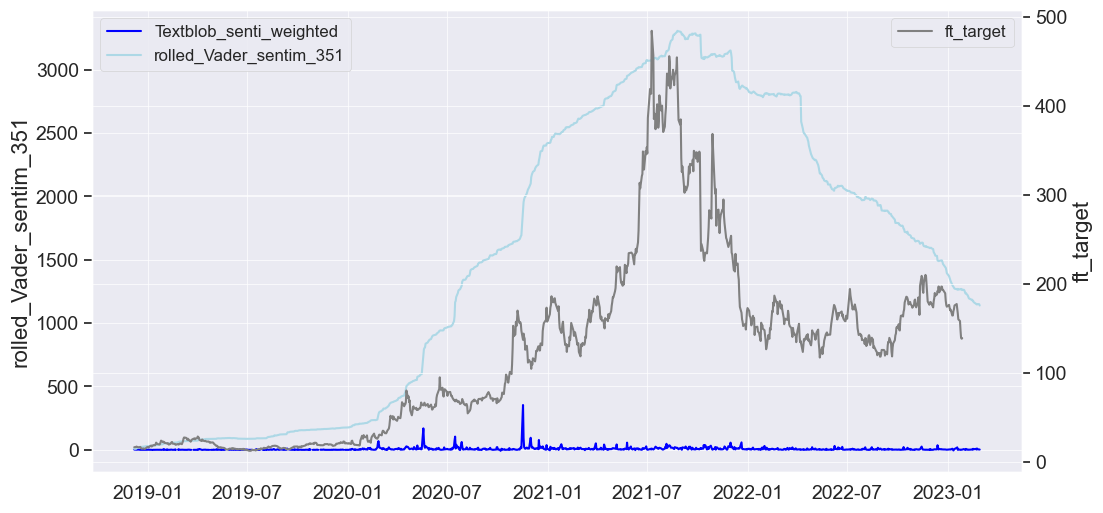

In [654]:
from utils import plot_three_line_chart
plot_three_line_chart(comp_pred_df_senti, "datetime", "Textblob_senti_weighted", "ft_target","rolled_Vader_sentim_351")

In [662]:
Ssenti_vars = ["rolled_Vader_sentim_351","rolled_Finbert_sentim_weighted_21"]# -> moderna
#Ssenti_vars = []

In [663]:
all_feat = date + macro_vars + google_vars + lagged_vars + techni_vars + fama_vars + ft_target + Ssenti_vars
modelling_ft = macro_vars + google_vars + lagged_vars + techni_vars + fama_vars + Ssenti_vars
comp_pred_final_df = comp_pred_final_df[all_feat]
comp_pred_final_df = comp_pred_final_df.iloc[:-1,:]

In [664]:
#xgboost_test = {'xgboost': {'alpha_estimation_method':'Lasso', "alpha": 0.0}}
xgboost_test = {'xgboost': {'alpha_estimation_method':'xgboost'}}

In [665]:
change = "returns - all variables - moerna - with sentiment - xgboost"
counter += 1
from class_backtester import Backtester as bk 
backtester = bk(df = comp_pred_final_df, 
                params = None,
                modeling_features = modelling_ft,
                rolling_frw = '1M',
                look_back_prm = 252, 
                configurations= xgboost_test, 
                col_to_pred = 'ft_target',
                days_avoid_bias = 0)

backtester.run_backtest()

100%|██████████| 42/42 [00:02<00:00, 14.96it/s]


In [666]:
resutls_df = backtester.dict_all_predictions["xgboost"][["datetime", "ft_target","ft_target_pred"]]
resutls_df['y_test'] = (resutls_df['ft_target'] > resutls_df['ft_target'].shift()).astype(int)
resutls_df['y_test'] = resutls_df['y_test'].fillna(0)
resutls_df['y_pred'] = (resutls_df['ft_target_pred'] > resutls_df['ft_target_pred'].shift()).astype(int)
resutls_df['y_pred'] = resutls_df['y_pred'].fillna(0)
resutls_df = resutls_df.set_index("datetime")
track_results["trial_"+str(counter)] = {}
track_results["trial_"+str(counter)]["changes"] = change
track_results["trial_"+str(counter)]["precision"] = precision_score(resutls_df["y_test"], resutls_df["y_pred"])
track_results["trial_"+str(counter)]["recall"] = recall_score(resutls_df["y_test"], resutls_df["y_pred"])
track_results["trial_"+str(counter)]["accuracy"] = accuracy_score(resutls_df["y_test"], resutls_df["y_pred"])
track_results["trial_"+str(counter)]["f1_score"] = f1_score(resutls_df["y_test"], resutls_df["y_pred"])
track_results["trial_"+str(counter)]["mae"] = round(mean_absolute_percentage_error(resutls_df.iloc[:,:2]["ft_target"], resutls_df.iloc[:,:2]["ft_target_pred"]),5)*100

In [667]:
track_results

{'trial_1': {'changes': 'returns - all variables - moerna - no sentiment - xgboost',
  'precision': 0.5054704595185996,
  'recall': 0.5214446952595937,
  'accuracy': 0.5067567567567568,
  'f1_score': 0.5133333333333334,
  'mae': 4.723999999999999},
 'trial_2': {'changes': 'returns - all variables - moerna - no sentiment - xgboost',
  'precision': 0.49330357142857145,
  'recall': 0.49887133182844245,
  'accuracy': 0.4932279909706546,
  'f1_score': 0.4960718294051627,
  'mae': 4.906},
 'trial_3': {'changes': 'returns - all variables - moerna - with sentiment - xgboost',
  'precision': 0.5054704595185996,
  'recall': 0.5214446952595937,
  'accuracy': 0.5067567567567568,
  'f1_score': 0.5133333333333334,
  'mae': 4.723999999999999},
 'trial_4': {'changes': 'returns - all variables - moerna - with sentiment - xgboost',
  'precision': 0.4699074074074074,
  'recall': 0.4592760180995475,
  'accuracy': 0.47237880496054113,
  'f1_score': 0.46453089244851253,
  'mae': 6.285},
 'trial_5': {'change

In [647]:
no_sentiment = resutls_df.copy()

In [673]:
no_sentiment["noSenti_resi"] = abs(no_sentiment["ft_target"] - no_sentiment["ft_target_pred"])
no_sentiment["noSenti_resi"] = no_sentiment["noSenti_resi"].rolling(31).mean()
resutls_df["Senti_resi"] = abs(resutls_df["ft_target"] - resutls_df["ft_target_pred"])
resutls_df["Senti_resi"] = resutls_df["Senti_resi"].rolling(31).mean()

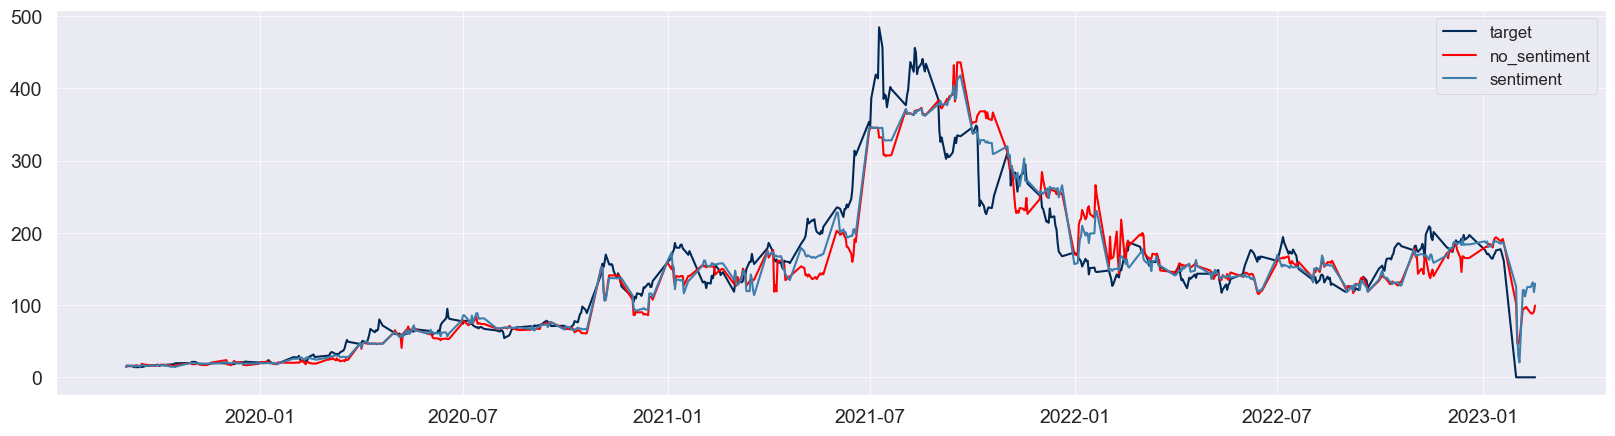

In [678]:
plt.figure(figsize=(20,5))
plt.plot(no_sentiment.index, no_sentiment.ft_target)
plt.plot(no_sentiment.index, no_sentiment.ft_target_pred, color = "red")
plt.plot(resutls_df.index, resutls_df.ft_target_pred)
plt.legend(["target", "no_sentiment", "sentiment"])
plt.show()

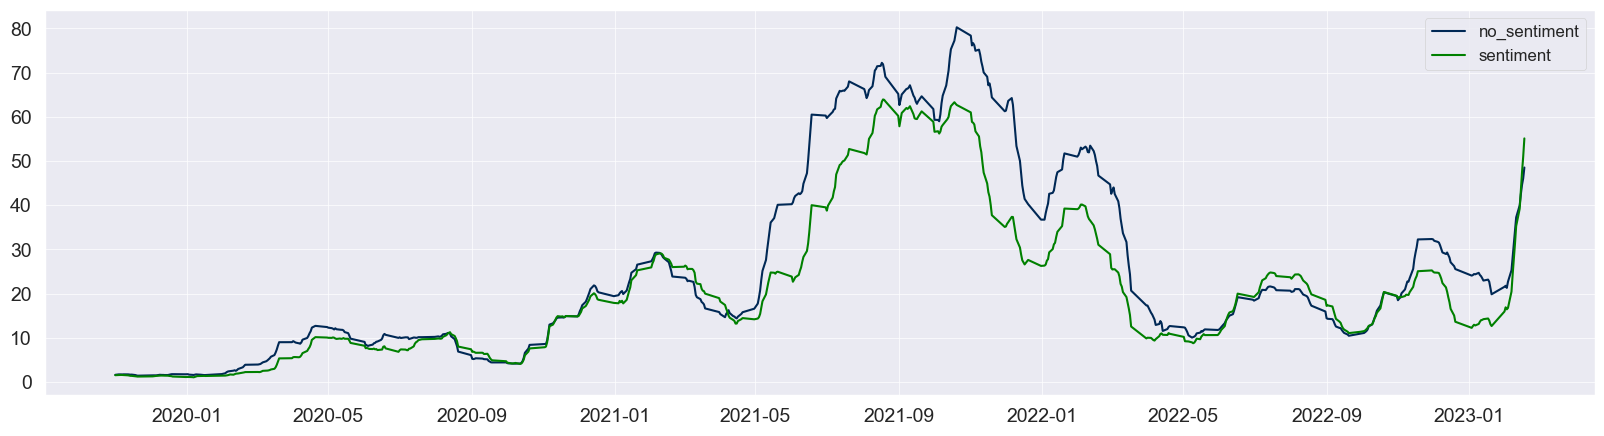

In [674]:
plt.figure(figsize=(20,5))
plt.plot(no_sentiment.index, no_sentiment.noSenti_resi)
plt.plot(resutls_df.index, resutls_df.Senti_resi, color = "green")
plt.legend(["no_sentiment", "sentiment"])
plt.show()

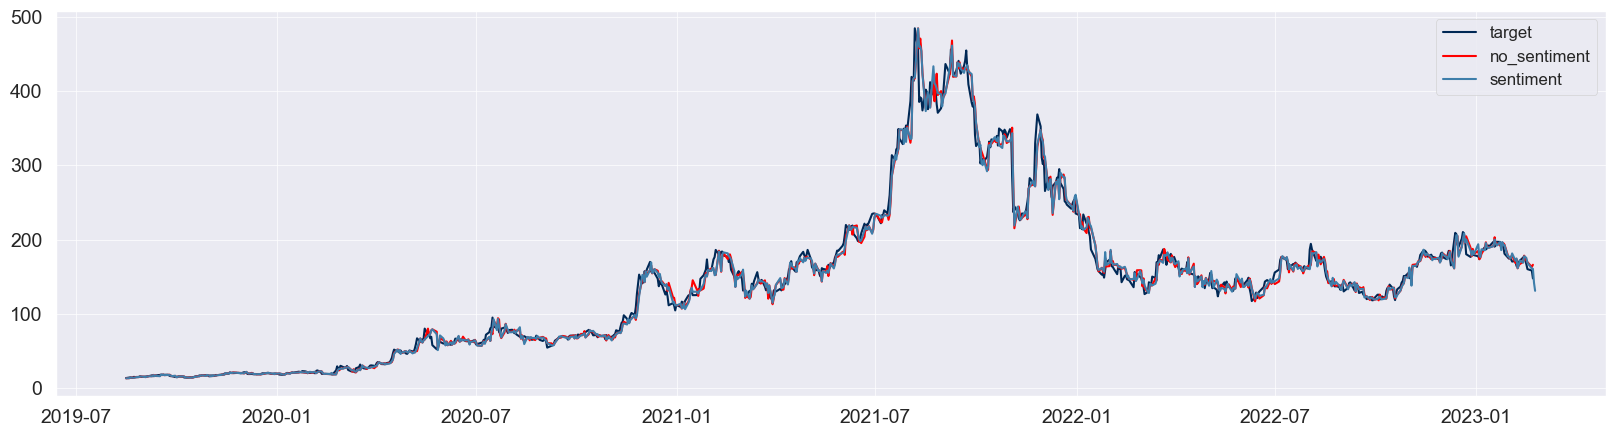

In [579]:
plt.figure(figsize=(20,5))
plt.plot(no_sentiment.index, no_sentiment.ft_target)
plt.plot(no_sentiment.index, no_sentiment.ft_target_pred, color = "red")
plt.plot(resutls_df.index, resutls_df.ft_target_pred)
plt.legend(["target", "no_sentiment", "sentiment"])
plt.show()

In [632]:
no_sentiment["noSenti_resi"] = abs(no_sentiment["ft_target"] - no_sentiment["ft_target_pred"])
no_sentiment["noSenti_resi"] = no_sentiment["noSenti_resi"].rolling(365).mean()
resutls_df["Senti_resi"] = abs(resutls_df["ft_target"] - resutls_df["ft_target_pred"])
resutls_df["Senti_resi"] = resutls_df["Senti_resi"].rolling(365).mean()

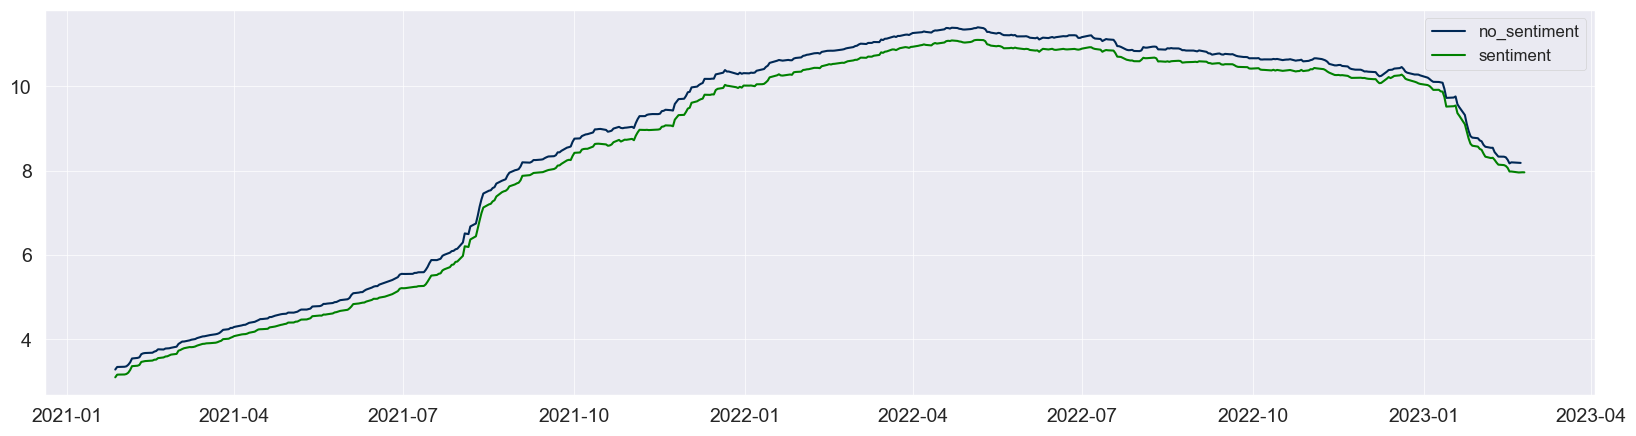

In [605]:
plt.figure(figsize=(20,5))
plt.plot(no_sentiment.index, no_sentiment.noSenti_resi)
plt.plot(resutls_df.index, resutls_df.Senti_resi, color = "green")
plt.legend(["no_sentiment", "sentiment"])
plt.show()